# FFT com Scipy
O módulo <code>scipy.fft</code> é mais completo e computacionalmente eficiente que o módulo <code>numpy.fft</code>, e bastante parecido no uso das funções básicas.

In [1]:
# importar os módulos e bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import librosa
import librosa.display

from scipy.fft import fft, ifft, fftshift, fftfreq

len(X)= 20000 amostras na frequência
len(x)= 20000 amostras no tempo


C:\Users\rkrum\AppData\Local\Temp/ipykernel_7316/3177023014.py:25: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f, np.abs(X)/N, 'b', \
C:\Users\rkrum\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


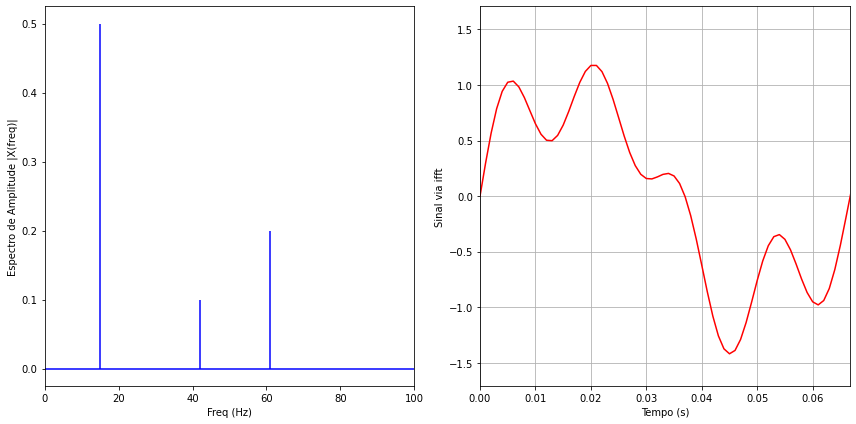

In [13]:
# Exemplo 1: uso básico e comparação de tempo

# geracao do sinal discreto x[n]=x(n.Ts)
f1,f2,f3 = 15, 42, 61        # freqs (Hz)
A1,A2,A3 = 1.0, 0.2, 0.4     # amplitudes
fs = 1000      # frequencia de amostragem (Hz)
dt = 1/fs      # periodo de amostragem (s)
tf = 20         # tempo final (s)

t = np.arange(0,tf,dt) # vetor de tempo
# geração do sinal
x = (A1*np.sin(2*np.pi*f1*t)
     + A2*np.sin(2*np.pi*f2*t)
     + A3*np.sin(2*np.pi*f3*t))

X = fft(x)
N = len(X)
print('len(X)=',N,'amostras na frequência')
print('len(x)=', len(x),'amostras no tempo')
f = np.arange(N)*fs/N

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(f, np.abs(X)/N, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Espectro de Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Tempo (s)')
plt.ylabel('Sinal via ifft')
plt.xlim(0, (1/f1))
plt.tight_layout()
plt.grid()

In [14]:
# Comparação de tempo entre numpy.fft e scipy.fft
%timeit fft(x)
%timeit np.fft.fft(x)

160 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
243 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Agora exemplos com arquivos de áudio.

In [15]:
# definindo uma funcao para plotar
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Ref: https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B_PythonAudio.html
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Tempo (amostras)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

Bluewhale file:  Fs = 4000, x.shape = (79572,), x.dtype = float32


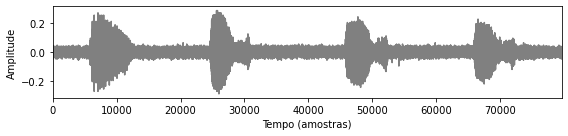

In [16]:
# Exemplo 2: Análise do espectro do canto da baleia azul

# carregando um arquivo
# lendo arquivo wav
file = os.path.join('.', 'data', 'bluewhale.au')
x,Fs = librosa.load(file, sr=None)
print_plot_play(x=x, Fs=Fs, text='Bluewhale file: ')

C:\Users\rkrum\AppData\Local\Temp/ipykernel_7316/2770221493.py:5: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f, np.abs(X), 'b', \


([<matplotlib.axis.XTick at 0x264ddeb0b20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

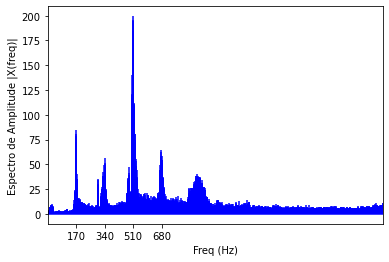

In [19]:
X = fft(x)
N = len(X)
f = np.arange(N)*Fs/N

plt.stem(f, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Espectro de Amplitude |X(freq)|')
plt.xlim(0, Fs/2)
plt.xticks([170, 340, 510, 680])

## Filtragem com a FFT
A filtragem é um processo de remoção/atenuação de conteúdo indesejado na característica do sinal sob certa perspectiva. Filtragem na frequência objetiva atenuação do conteúdo espectral nas faixas de frequência desejadas.

A grosso modo, o papel de um *filtro passa-baixas* é remover o conteúdo espectral acima de uma frequência de corte. Inversamente, o *filtro passa-altas* remove o conteúdo espectral abaixo de uma frequência de corte. Juntando um filtro passa-baixas e um passa-altas é possível construir um filtro passa-faixa ou um rejeita-faixa.

No exemplo a seguir vamos remover conteúdo de frequência de forma simplificada utilizando a FFT (técnicas de projeto de bons filtros são mais refinadas).

C:\Users\rkrum\AppData\Local\Temp/ipykernel_7316/2868656591.py:17: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f, np.abs(X_filt), 'b', \


Bluewhale file:  Fs = 4000, x.shape = (79572,), x.dtype = complex64


C:\Users\rkrum\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


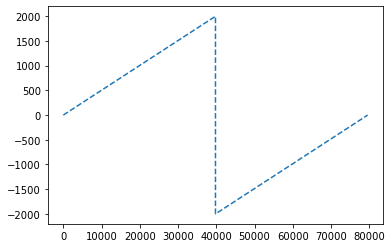

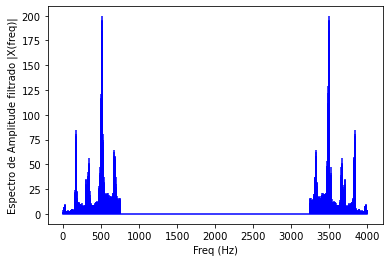

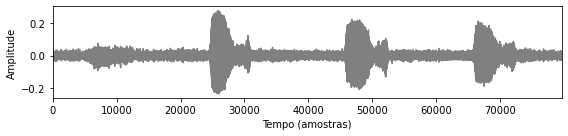

C:\Users\rkrum\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [20]:
# Exemplo de filtragem do canto da baleia com a FFT

X_filt = X.copy()
freq = fftfreq(N,1/Fs)

plt.figure()
plt.plot(freq,'--')
#plt.stem(freq)

# frequência de corte
fc = 750
X_filt[np.abs(freq) > fc] = 0.
x_filt = ifft(X_filt)

# plot do espectro de amplitude resultante
plt.figure()
plt.stem(f, np.abs(X_filt), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Espectro de Amplitude filtrado |X(freq)|')
#plt.xlim(0, Fs/2)

# imprime o sinal filtrado
print_plot_play(x=x_filt, Fs=Fs, text='Bluewhale file: ')

Exemplo 3: espectro do som do sabre de luz do StarWars

File:  Fs = 11025, x.shape = (29963,), x.dtype = float32


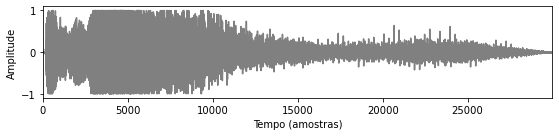

In [21]:
# lendo arquivo wav
file = os.path.join('.', 'data', 'maulsabre.wav')
x,Fs = librosa.load(file, sr=None)
print_plot_play(x=x, Fs=Fs, text='File: ')

C:\Users\rkrum\AppData\Local\Temp/ipykernel_7316/2829350096.py:7: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f, np.abs(X), 'b', \
C:\Users\rkrum\AppData\Local\Temp/ipykernel_7316/2829350096.py:14: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f, np.abs(X), 'b', \


(0.0, 1000.0)

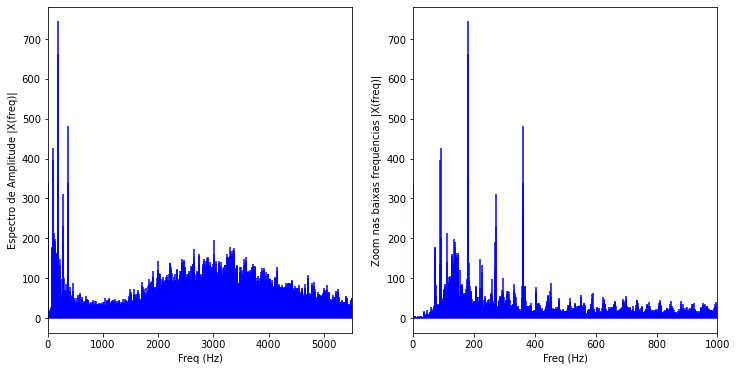

In [22]:
X = fft(x)
N = len(X)
f = np.arange(N)*Fs/N

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Espectro de Amplitude |X(freq)|')
plt.xlim(0, Fs/2)

plt.subplot(122)
plt.stem(f, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Zoom nas baixas frequências |X(freq)|')
plt.xlim(0, 1000)

C:\Users\rkrum\AppData\Local\Temp/ipykernel_7316/2759999918.py:13: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f, np.abs(X_filt), 'b', \


Sabre file:  Fs = 11025, x.shape = (29963,), x.dtype = complex64


C:\Users\rkrum\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


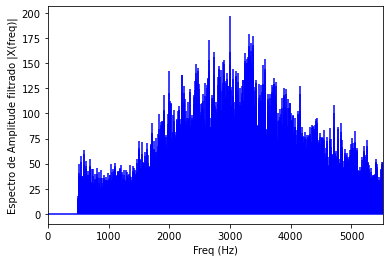

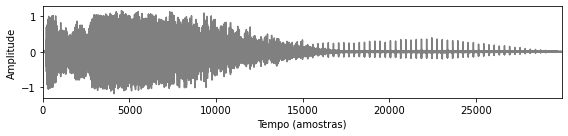

C:\Users\rkrum\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [23]:
# Exemplo de filtragem passa-altas do sabre de luz com a FFT

X_filt = X.copy()
freq = fftfreq(N,1/Fs)

# frequência de corte
fc = 500
X_filt[np.abs(freq) < fc] = 0. # passa-altas
x_filt = ifft(X_filt)

# plot do espectro de amplitude resultante
plt.figure()
plt.stem(f, np.abs(X_filt), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Espectro de Amplitude filtrado |X(freq)|')
plt.xlim(0, Fs/2)

# imprime o sinal filtrado
print_plot_play(x=x_filt, Fs=Fs, text='Sabre file: ')